# This file draws colored networks

In [1]:
##Import packages and files
from itertools import compress, product
import numpy as np
import matplotlib.pyplot as plt
import array
import random
import pandas as pd
import itertools
import operator
import importlib
#import functions defining the layered landscape
from LayeredLandscapeFunctions import *
from Landscapes import *
import networkx as nx


In [125]:
#load in transition matrix
df_transition = pd.read_csv('N-10_K1=3_K2=9_I=21.csv')
df_transition = df_transition.set_index('Unnamed: 0')#reset index
Mat = Markov_Clustering(df_transition)
MarkClsuMatrix = nx.from_numpy_matrix(Mat) #convert to adjacency matrix undirected


# Coloring Parameters
We set noze size by fitness, then color by markov cluster, then set edge weights and intensity

In [126]:
#Set Node attributes by fitness here

##get the mapping
df_map = pd.read_csv('N-10_K1=3_K2=9_I=21_mapping.csv')
#restrict it to maximas
df_map_restricted = df_map[df_map.Maxima==1]
#Get the  minima and maxima of the peak fitness to pass values for later colors
Max_peak_fit = df_map_restricted.Fitness.max()
Min_peak_fit = df_map_restricted.Fitness.min()


##set size based upon fitness
Size_Fit_Mapping = (df_map_restricted.Fitness-Min_peak_fit)/(Max_peak_fit-Min_peak_fit) * 400 +10

#Set colors based upon fitness with maxima being red and minima being blue
color_map = []
#for node in MarkClsuMatrix:
#    #set node color gradient based upon relative distance from min and max fitness
#    color_gradient = (((df_map_restricted.Fitness.iloc[node])-Min_peak_fit)/(Max_peak_fit-Min_peak_fit))
#    color_map.append( (color_gradient,0,1-color_gradient)) #cyan
#
#nx.draw(MarkClsuMatrix, node_color=color_map, with_labels=False)
#plt.show()
#print('The highest fitnesses are red')

In [127]:
#Color connected components
#get the connected components
G= nx.Graph(MarkClsuMatrix)
Components = list(nx.connected_components(G))

##loop throught the compoenents and assign colors to nodes with a cluster color mapping
j=0 #number to index number of components
cluster_color_map = [0]*len(MarkClsuMatrix)

NumComp = len(Components)
for comp in Components:
    random_middle_color = random.random()
    for i in comp:
        #print(i)
        cluster_color_map[i] = (j/NumComp,random_middle_color,1-j/NumComp)
    j+=1
    #print(comp)
    


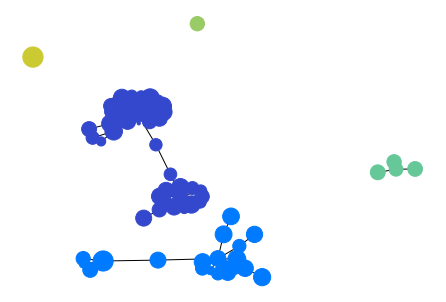

Colored Markov Clusters


In [128]:
nx.draw(MarkClsuMatrix, node_color=cluster_color_map, with_labels=False,node_size =Size_Fit_Mapping)
plt.show()
print('Colored Markov Clusters')

In [108]:
#Create a directed graph of the transition matrix
NewDF = df_transition[df_transition.div(df_transition.sum(axis=1), axis=0)>8/(len(df_transition))]
NewDF = NewDF.fillna(0) #replace nas with zeros

#set node size based upon some scaling of the fitness
DiGraph_Transition = nx.from_numpy_matrix(NewDF.to_numpy()) #convert to adjacency matrix undirected
DiGraph_Transition = nx.DiGraph(DiGraph_Transition) #convert to directed graph (digraph)

#nx.draw(NewMat, node_color=cluster_color_map, node_size = list(Size_Fit_Mapping),edge_cmap=plt.cm.Blues, with_labels=True,arrows=True)



In [109]:
#1/(len(df_transition))

In [110]:
#color the edges
for u,v,d in DiGraph_Transition.edges(data=True):
    #print(u,v)
    d['weight'] = df_transition.iloc[u,v]/df_transition.iloc[u].sum()**1.2*100 #scaling parameter
    
edges,weights = zip(*nx.get_edge_attributes(DiGraph_Transition,'weight').items())


# Finally Graph it all
Colors by markov cluster,
Size by node fitness
Edge color intensity and width by the transition probability

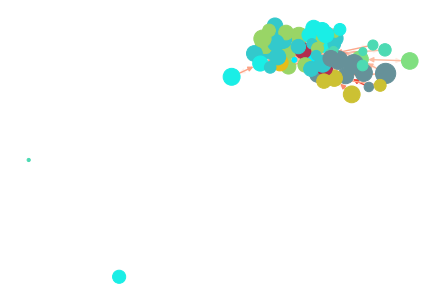

In [111]:
##Fi
pos = nx.spring_layout(DiGraph_Transition) #set spring layout
nx.draw(DiGraph_Transition, pos, node_color=cluster_color_map,
        edgelist=edges, edge_color=weights,
        width=d['weight']**.2, edge_cmap=plt.cm.Reds,
       node_size = list(Size_Fit_Mapping),with_labels=False)


In [112]:
d['weight']

4.270391721485353